In [1]:
import matplotlib.pyplot as plt
import sys
import os
# Add the parent directory to the path to import src as a package
sys.path.insert(0, os.path.abspath('..'))
from src import dataloader
import importlib
importlib.reload(dataloader)
import numpy as np
import mne
%matplotlib widget
plot_flag = False

In [2]:
dyad_id = "W030"
lowcut=1.0
highcut=40.0
eeg_filter_type = 'iir' # choose 'fir' or 'iir' for EEG filtering
q=1  # decimation factor
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", 
                                                    dyad_id = dyad_id, 
                                                    load_eeg=True, 
                                                    load_et=True, 
                                                    lowcut=lowcut, 
                                                    highcut=highcut, 
                                                    eeg_filter_type=eeg_filter_type, 
                                                    interpolate_et_during_blinks_threshold=0.3,
                                                    median_filter_size=64,
                                                    low_pass_et_order=351,
                                                    et_pos_cutoff=128,
                                                    et_pupil_cutoff=4,
                                                    pupil_model_confidence=0.9,
                                                    decimate_factor=q,
                                                    plot_flag=plot_flag)


Detected events: [{'name': 'Brave', 'start': 387.806640625, 'duration': 59.3310546875}, {'name': 'Peppa', 'start': 248.5107421875, 'duration': 59.6328125}, {'name': 'Incredibles', 'start': 318.3603515625, 'duration': 59.212890625}, {'name': 'Talk_1', 'start': 594.4892578125, 'duration': 181.0556640625}, {'name': 'Talk_2', 'start': 836.7275390625, 'duration': 181.056640625}]
Applying iir filters to EEG data.
Reseting the EEG time to the start of Peppa
ET time range: 241.59s to 461.89s
Reseting the ET time to the start of m2
Processing member: ch, blink column: ET_ch_blinks
Processing member: cg, blink column: ET_cg_blinks


In [3]:
multimodal_data.data.columns    

Index(['time_idx', 'EEG_ch_Fp1', 'EEG_ch_Fp2', 'EEG_ch_F7', 'EEG_ch_F3',
       'EEG_ch_Fz', 'EEG_ch_F4', 'EEG_ch_F8', 'EEG_ch_M1', 'EEG_ch_T3',
       'EEG_ch_C3', 'EEG_ch_Cz', 'EEG_ch_C4', 'EEG_ch_T4', 'EEG_ch_M2',
       'EEG_ch_T5', 'EEG_ch_P3', 'EEG_ch_Pz', 'EEG_ch_P4', 'EEG_ch_T6',
       'EEG_ch_O1', 'EEG_ch_O2', 'EEG_cg_Fp1', 'EEG_cg_Fp2', 'EEG_cg_F7',
       'EEG_cg_F3', 'EEG_cg_Fz', 'EEG_cg_F4', 'EEG_cg_F8', 'EEG_cg_M1',
       'EEG_cg_T3', 'EEG_cg_C3', 'EEG_cg_Cz', 'EEG_cg_C4', 'EEG_cg_T4',
       'EEG_cg_M2', 'EEG_cg_T5', 'EEG_cg_P3', 'EEG_cg_Pz', 'EEG_cg_P4',
       'EEG_cg_T6', 'EEG_cg_O1', 'EEG_cg_O2', 'events', 'diode', 'ECG_ch',
       'ECG_cg', 'IBI_ch', 'IBI_cg', 'ET_event', 'ET_ch_x', 'ET_ch_y',
       'ET_ch_pupil', 'ET_ch_blinks', 'ET_cg_x', 'ET_cg_y', 'ET_cg_pupil',
       'ET_cg_blinks', 'time'],
      dtype='object')

Creating RawArray with float64 data, n_channels=21, n_times=60635
    Range : 71526 ... 132160 =     69.850 ...   129.062 secs
Ready.
<RawArray | 21 x 60635 (59.2 s), ~9.7 MiB, data loaded>
<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, M1, T3, C3, Cz, C4, T4, M2, T5, ...
 chs: 21 EEG
 custom_ref_applied: False
 description: EEG filtered with iir filters: highpass=1.0Hz, lowpass=40.0Hz, ...
 dig: 24 items (3 Cardinal, 21 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 21
 projs: []
 sfreq: 1024.0 Hz
>
Using matplotlib as 2D backend.


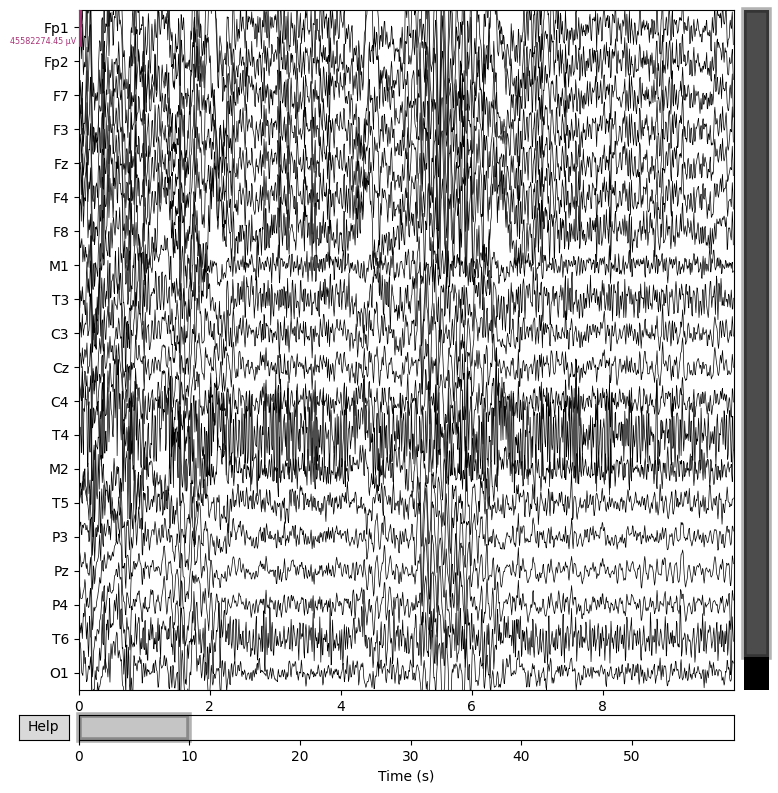

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


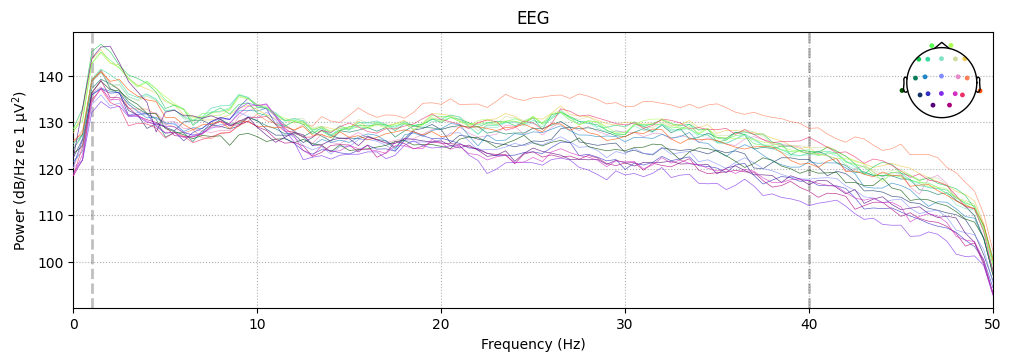

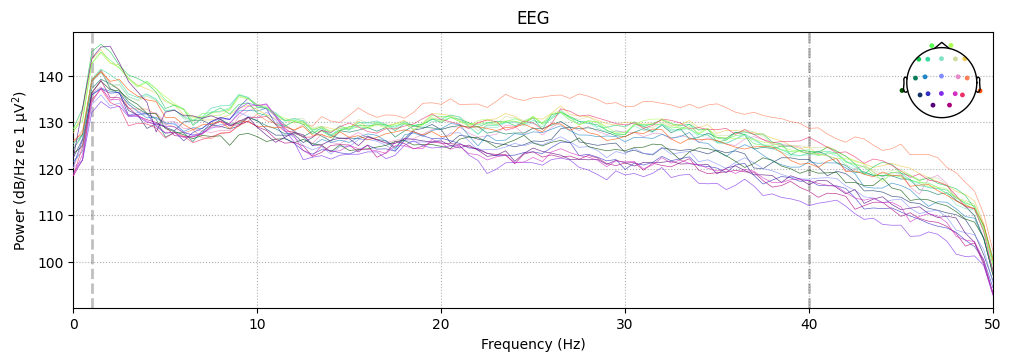

In [4]:
%matplotlib inline
raw = dataloader.export_eeg_to_mne_raw(multimodal_data, who="cg", events='Incredibles', times=None)
print(raw)
print(raw.info)
raw.plot(scalings='auto')
raw.plot_psd(fmax=50)


In [5]:
print(raw.first_samp)
print(raw.first_time)
print(raw.times[0])
print(raw.times[-1])

71526
69.849609375
0.0
59.212890625


In [6]:
raw.info['description']

'EEG filtered with iir filters: highpass=1.0Hz, lowpass=40.0Hz, notch=50Hz (Q=30). Reference: linked ears montage: (M1+M2)/2'